## MERRA2 Aerosol Hourly Granularity
- Download
- Trim
- Create Cutout
- Generate Wind Outputs

# 1. Imports and Download

In [2]:
import geodata
import xarray as xr
import logging
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.INFO)

In [3]:
DS = geodata.Dataset(module="merra2",
					 years=slice(2015, 2015),
					 months=slice(2,2),
                     weather_data_config = "surface_aerosol_hourly")  

INFO:geodata.dataset:Directory /Users/williamhonaker/Desktop/davidson/data_for_geodata/merra2 found, checking for completeness.
INFO:geodata.dataset:Directory complete.


In [3]:
## Verify Dataset
DS.__dict__

{'module': 'merra2',
 'config': 'surface_aerosol_hourly',
 'dataset_module': <module 'geodata.datasets.merra2' from '/Users/michd/.pyenv/versions/3.6.9/lib/python3.6/site-packages/geodata-0.0.1-py3.6.egg/geodata/datasets/merra2.py'>,
 'weatherconfig': {'file_granularity': 'daily',
  'tasks_func': <function geodata.datasets.merra2.tasks_daily_merra2(xs, ys, yearmonths, prepare_func, **meta_attrs)>,
  'meta_prepare_func': <function geodata.datasets.merra2.prepare_meta_merra2(xs, ys, year, month, template, module, **params)>,
  'prepare_func': <function geodata.datasets.merra2.prepare_month_aerosol(fn, year, month, xs, ys)>,
  'template': '/Users/michd/Documents/GEODATA/data/merra2/{year}/{month:0>2}/MERRA2_*.tavg1_2d_aer_Nx.*.nc4',
  'url': 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXAER.5.12.4/{year}/{month:0>2}/MERRA2_{spinup}.tavg1_2d_aer_Nx.{year}{month:0>2}{day:0>2}.nc4',
  'fn': '/Users/michd/Documents/GEODATA/data/merra2/{year}/{month:0>2}/MERRA2_{spinup}.tavg1_2d_

In [3]:
if DS.prepared == False:
	DS.get_data()

('surface_aerosol_hourly', '/Users/michd/Documents/GEODATA/data/merra2/2015/MERRA2_400.tavg1_2d_aer_Nx.20150201.nc4', 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXAER.5.12.4/2015/02/MERRA2_400.tavg1_2d_aer_Nx.20150201.nc4')
file completed
('surface_aerosol_hourly', '/Users/michd/Documents/GEODATA/data/merra2/2015/MERRA2_400.tavg1_2d_aer_Nx.20150202.nc4', 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXAER.5.12.4/2015/02/MERRA2_400.tavg1_2d_aer_Nx.20150202.nc4')
file completed
('surface_aerosol_hourly', '/Users/michd/Documents/GEODATA/data/merra2/2015/MERRA2_400.tavg1_2d_aer_Nx.20150203.nc4', 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXAER.5.12.4/2015/02/MERRA2_400.tavg1_2d_aer_Nx.20150203.nc4')
file completed
('surface_aerosol_hourly', '/Users/michd/Documents/GEODATA/data/merra2/2015/MERRA2_400.tavg1_2d_aer_Nx.20150204.nc4', 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXAER.5.12.4/2015/02/MERRA2_400.tavg1_2d_aer_Nx.20150204.nc4')

KeyboardInterrupt: 

## 2. Trim

In [5]:
DS.trim_variables()

## Variables after trimming
ds = xr.open_dataset(DS.downloadedFiles[0][1])
list(ds.data_vars)

['bcsmass', 'dusmass25', 'ocsmass', 'so4smass', 'sssmass25']

# 3. Create Cutout

In [4]:
cutout = geodata.Cutout(name="beijing-2015-pm25",
                        module="merra2",
                        weather_data_config="surface_aerosol_hourly",
                        xs=slice(110, 125),
                        ys=slice(35, 45),
                        years=slice(2015, 2015),
                        months=slice(2,2))


INFO:geodata.cutout:Cutout (beijing-2015-pm25, /Users/williamhonaker/Desktop/davidson/data_for_geodata/cutouts) not found or incomplete.


In [5]:
cutout.prepare(overwrite=True)

INFO:geodata.preparation:Starting preparation of cutout 'beijing-2015-pm25'
INFO:geodata.datasets.merra2:MultiIndex([(2015, 2)],
           names=['year', 'month'])
INFO:geodata.datasets.merra2:[(2015, 2, 1), (2015, 2, 2), (2015, 2, 3), (2015, 2, 4), (2015, 2, 5), (2015, 2, 6), (2015, 2, 7), (2015, 2, 8), (2015, 2, 9), (2015, 2, 10), (2015, 2, 11), (2015, 2, 12), (2015, 2, 13), (2015, 2, 14), (2015, 2, 15), (2015, 2, 16), (2015, 2, 17), (2015, 2, 18), (2015, 2, 19), (2015, 2, 20), (2015, 2, 21), (2015, 2, 22), (2015, 2, 23), (2015, 2, 24), (2015, 2, 25), (2015, 2, 26), (2015, 2, 27), (2015, 2, 28)]
INFO:geodata.preparation:28 tasks have been collected. Starting running them on all processors.
INFO:geodata.datasets.merra2:Opening `/Users/williamhonaker/Desktop/davidson/data_for_geodata/merra2/2015/02/MERRA2_400.tavg1_2d_aer_Nx.20150203.nc4`
INFO:geodata.datasets.merra2:Opening `/Users/williamhonaker/Desktop/davidson/data_for_geodata/merra2/2015/02/MERRA2_400.tavg1_2d_aer_Nx.20150205.nc4

In [13]:
## Verify Cutout Coords
cutout.coords

Coordinates:
  * y           (y) float64 35.0 35.5 36.0 36.5 37.0 ... 43.5 44.0 44.5 45.0
  * time        (time) datetime64[ns] 2015-02-01T00:30:00 ... 2015-02-13T23:30:00
  * x           (x) float64 110.0 110.6 111.2 111.9 ... 123.1 123.8 124.4 125.0
    lon         (x) float64 110.0 110.6 111.2 111.9 ... 123.1 123.8 124.4 125.0
    lat         (y) float64 35.0 35.5 36.0 36.5 37.0 ... 43.5 44.0 44.5 45.0
  * year-month  (year-month) MultiIndex
  - year        (year-month) int64 2015
  - month       (year-month) int64 2

# 4. Generate Outputs

In [10]:
ds_pm25 = geodata.convert.pm25(cutout)
df_pm25 = ds_pm25.to_dataframe(name='pm25')
df_pm25.reset_index(inplace=True)
df_pm25

TypeError: sel() argument after ** must be a mapping, not str

In [12]:
df_pm25.to_csv('beijing-2015-pm25.csv')

# 5. Plot Outputs

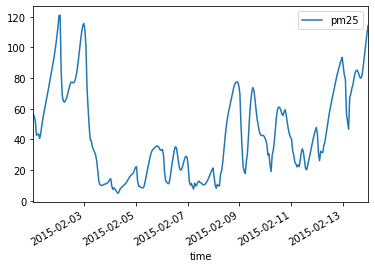

In [13]:
## using panda plots
df_pm25[(df_pm25.lat == 39.5) & (df_pm25.lon == 116.25)].plot(x='time', y='pm25')
plt.show()

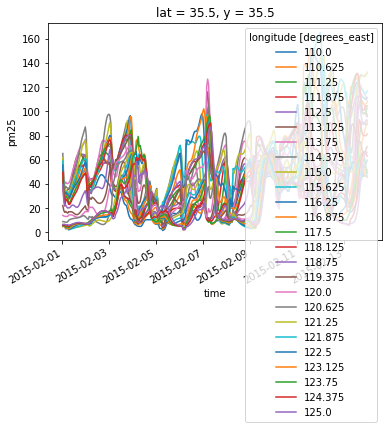

In [19]:
## using xarray plots (http://xarray.pydata.org/en/stable/plotting.html)
ds_pm25.isel(y=1).plot.line(x='time', hue='lon');

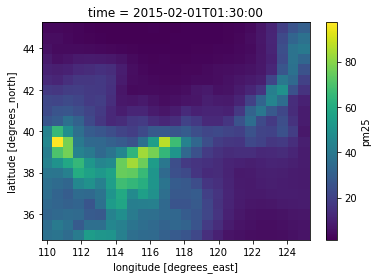

In [20]:
ds_pm25.isel(time=1).plot();

In [2]:
# plot with cartopy
import cartopy.crs as ccrs

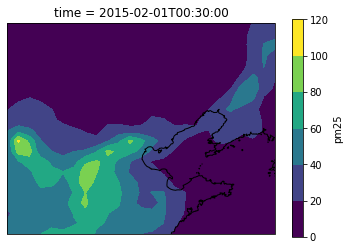

In [16]:
ax = plt.axes(projection=ccrs.Miller(116.25))
ax.set_extent([110, 125, 35, 45])
ds_pm25.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines();

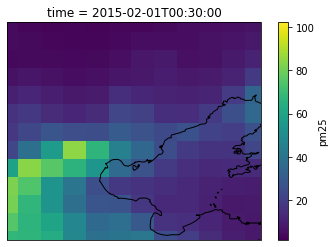

In [17]:
ax = plt.subplot(projection=ccrs.PlateCarree());
ax.set_extent([115, 122, 37, 43])
ds_pm25.isel(time=0).plot.pcolormesh('lon', 'lat', ax=ax);
ax.coastlines();